<a href="https://colab.research.google.com/github/mamathaguntu/CMPE255/blob/master/DR_Tabular_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Dimensionality Reduction Techniques**###



**Breast cancer diagnostic data from Kaggle**

This dataset is available in sklearn as well.

attributes  : ID number and Diagnosis

features:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g). concavity (severity of concave portions of the contour)

h). concave points (number of concave portions of the contour)

i). symmetry

j). fractal dimension ("coastline approximation" - 1)


**Import libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import (PCA, IncrementalPCA,
                                   KernelPCA, TruncatedSVD,
                                   FastICA, MiniBatchDictionaryLearning,
                                   SparsePCA)

from sklearn.manifold import (Isomap, LocallyLinearEmbedding,TSNE)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.random_projection import (GaussianRandomProjection, SparseRandomProjection)
from sklearn.neighbors import (KNeighborsClassifier, NeighborhoodComponentsAnalysis)
                               
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [5]:
import sklearn.datasets as datasets
data = datasets.load_breast_cancer()



In [9]:

x = data['data']
y = data['target']
dim = len(x[0])
n_classes = len(np.unique(y))
n_neighbors = 3
random_state = 0

x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.5, stratify=y,
                     random_state=random_state)

In [10]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(284, 30) (284,)
(285, 30) (285,)


**PCA**

In [11]:
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2,
                        random_state=random_state))

**SVD**

In [12]:
svd = make_pipeline(StandardScaler(),
                    TruncatedSVD(n_components=2,
                                 algorithm='randomized',
                                 random_state=random_state,
                                 n_iter=5))

**ISOMAP**

In [13]:
isomap = make_pipeline(StandardScaler(),
                       Isomap(n_components=2,
                              n_jobs = 4,
                              n_neighbors = 5))

**LLE**

In [14]:
lle = make_pipeline(StandardScaler(),
                    LocallyLinearEmbedding(n_components=2,
                                           n_neighbors = 10,
                                           method = 'modified',
                                           n_jobs = 4,
                                           random_state=random_state))

**T-SNE**

In [16]:
tsne = make_pipeline(StandardScaler(),
                     TSNE(n_components=2, init='pca', random_state=42))

**UMAP**

In [17]:
pip install umap-learn

     |████████████████████████████████| 86 kB 3.3 MB/s 
     |████████████████████████████████| 1.1 MB 62.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=6dd0bf5774fa0264d499c9933ad2d1d92a0f13f7926043238f4f06e80eb80acf
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=bf1fdec190220fca353208f070f257b6bdad6f6a13d02a8a85e504528fb63e57
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [18]:
import umap

u_map = make_pipeline(StandardScaler(), umap.UMAP(n_components=2, random_state=42))

Evaluate the techniques

In [19]:
knc = KNeighborsClassifier(n_neighbors=n_neighbors)

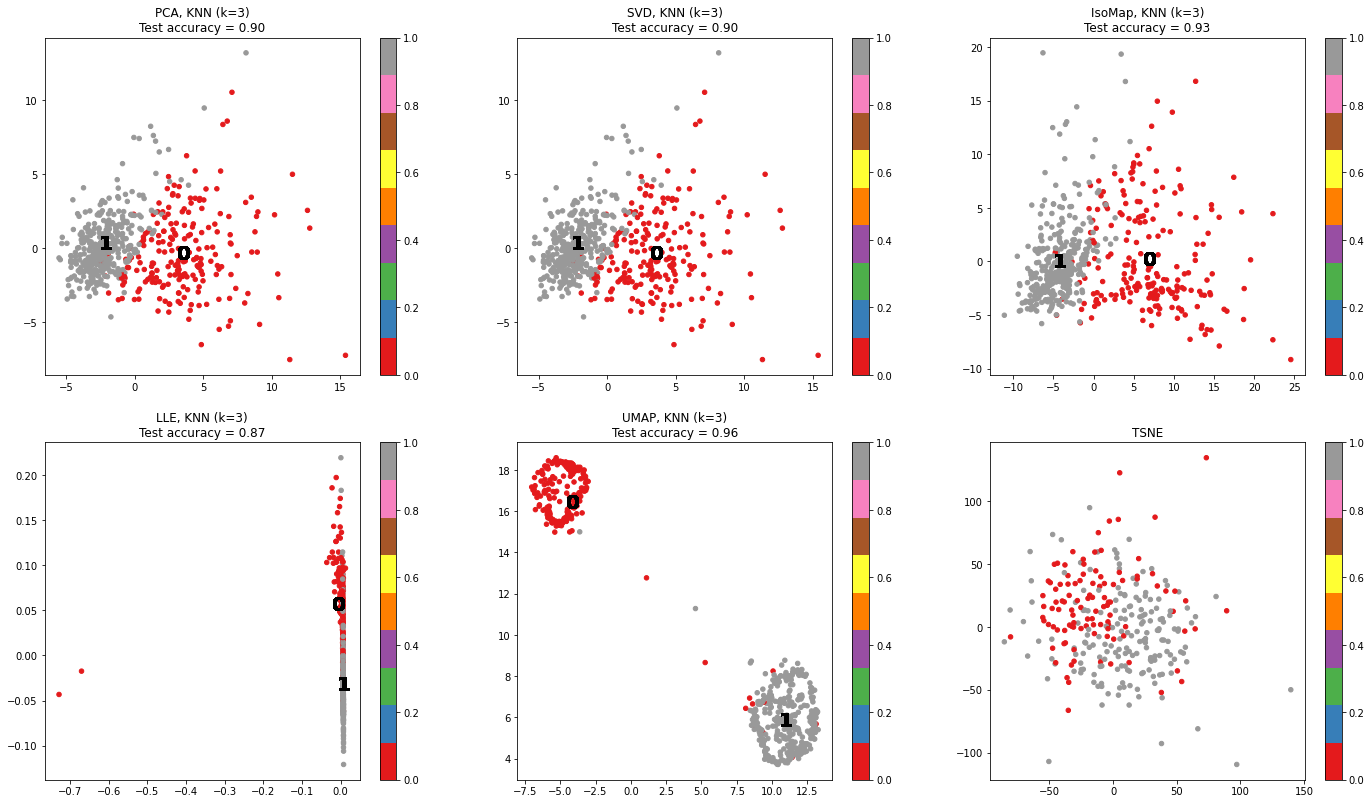

In [35]:
import warnings
warnings.filterwarnings('ignore')

dim_reduction_methods = {'PCA': pca, 'SVD': svd, 'IsoMap': isomap, 'LLE': lle, 'UMAP' : u_map}


plt.figure(figsize=(24, 36))

for j,(name, model) in enumerate(dim_reduction_methods.items()):
    plt.subplot(5, 3, j + 1, aspect='auto')

    # Fit model
    model.fit(x_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knc.fit(model.transform(x_train), y_train)

    acc_knn = knc.score(model.transform(x_test), y_test)

    # Fit the methons using the fitted model
    x_embedded = model.transform(x)
    
    # Creating a dataframe to easily plot the sample label
    df = pd.DataFrame(np.concatenate((x_embedded, np.reshape(y, (-1, 1))), axis=1))

    # Plot the projected points and show the evaluation score
    plt.scatter(x_embedded[:, 0], x_embedded[:, 1], c=y, s=20, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))
    plt.colorbar()
    
    # Label the data distributions
    for i, number in enumerate(y_test):
        plt.annotate(number,
                     df.loc[df[2]==number,[0,1]].mean(),
                     horizontalalignment='center',
                     verticalalignment='center',
                     weight='bold',
                     size='20')
        
plt.subplot(5, 3, j + 2, aspect='auto')

pca_8 = PCA(n_components=8)
pca_result_8 = pca_8.fit_transform(x_train)
tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=400).fit_transform(pca_result_8)
plt.scatter(tsne[:, 0],tsne[:, 1], c=y_train, s=20, cmap='Set1')
plt.title("TSNE")
plt.colorbar()
    
plt.show()

**Conclusion**


UMAP, with highest accuracy of 0.96 , provides better vizualisation than other techniques by removing the outliers and binding the data points in proper clusters.